<a href="https://colab.research.google.com/github/luszczewskakasia/robot/blob/main/robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

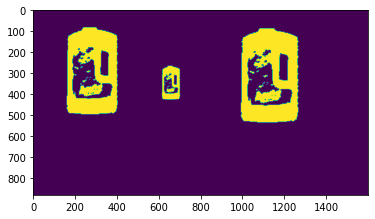

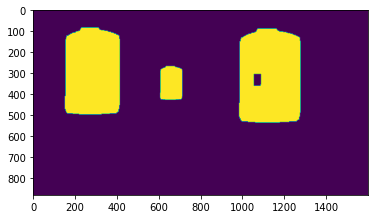

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
296.3796021060403
283.9518078141089


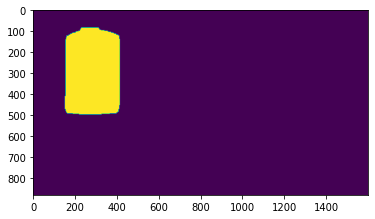

102942
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
318.6162787854086
1132.3955084573058


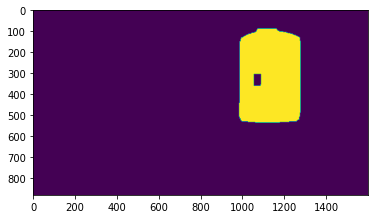

122675
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
349.1366884316866
659.8079339657509


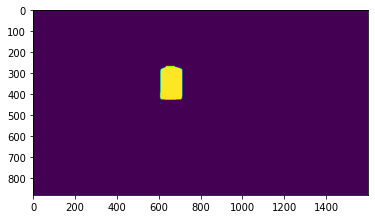

16234


In [41]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
import os
import copy
import random
import matplotlib.image as mpimg

circles = cv2.imread("487px-OpenCV_Logo_with_text.png", cv2.IMREAD_COLOR)
andy = cv2.imread("Bez tytułu.png",cv2.IMREAD_COLOR)

hsv = cv2.cvtColor(andy, cv2.COLOR_BGR2HSV) #detecting only green colour
lower_bound = np.array([50, 20, 20])	 
upper_bound = np.array([100, 255, 255])

mask = cv2.inRange(hsv, lower_bound, upper_bound)
ret,thr = cv2.threshold(mask,0,255,cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
plt.imshow(mask)
plt.show()

#uzupełniło kolorystczne luki zielonego
close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((50,50)))
improved=cv2.dilate(close,np.ones((1,21)))
buff = improved
plt.imshow(improved)
plt.show()


#find built-in segmentation function
def segmentation(img, coord, l):
  img = img.astype(np.int16)
  segmented = np.zeros(img.shape)
  segmented[coord[0]][coord[1]] = 255 #zazanaczony biały pixel 
  dilate = cv2.dilate(segmented, np.ones((30,30)))

  for i in range(40):
    dilate = cv2.dilate(dilate, np.ones((30,30)))
    super_threshold_indices = dilate > img
    dilate[super_threshold_indices] = 0
  
  return dilate



#sprawdza czy są białe pixele
#wykrywa największy element
while not len(np.where(buff == [255])[0]) == 0:
  find_pixel = np.where(buff == [255])
  segmented = segmentation(buff, (find_pixel[0][0], find_pixel[1][0]), 10)
  print(segmented)
  position = np.where(segmented == [255])
  #potem w robocie jesli chcemy butelkę po prawej, to patrzymy gdzie jest pozycja i karzemy ustawić robotowi pozycję na lewo
  #if, jesli straci butelkę, to ma się obrócić i znaleźć kolejną butelkę
  print(np.average(position[0]))
  print(np.average(position[1]))
  buff = buff - segmented
  plt.imshow(segmented)
  plt.show()
  white_pix2 = cv2.countNonZero(segmented)
  print(white_pix2)


